<a href="https://colab.research.google.com/github/sanjeewaherath1/Bootcamp/blob/main/Student_MLE_MiniProject_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [ ]:
# Load data and split into feature and target variables
(breast_cancer_data, target) = load_breast_cancer(as_frame = True, return_X_y = True)
# target.head()

In [ ]:
# View first 5 rows of the data
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# View first 5 rows of the target
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [ ]:
# How frequently does the positive target occur?
target_positive_percentage = target.sum()/target.count() * 100
print(f"Target positive percentage:{round(target_positive_percentage, 2)}%")

Target positive percentage:62.74%


In [ ]:
# Detect any missing value in target dataframe
print(target.isna().sum())

0


**There are no missing values in the target.**

In [ ]:
target.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
print(breast_cancer_data.isna().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


**There are no missing values in the cancer data.**

In [ ]:
target.count()

569

In [ ]:
# Generate summary statistics for the data
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
30


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

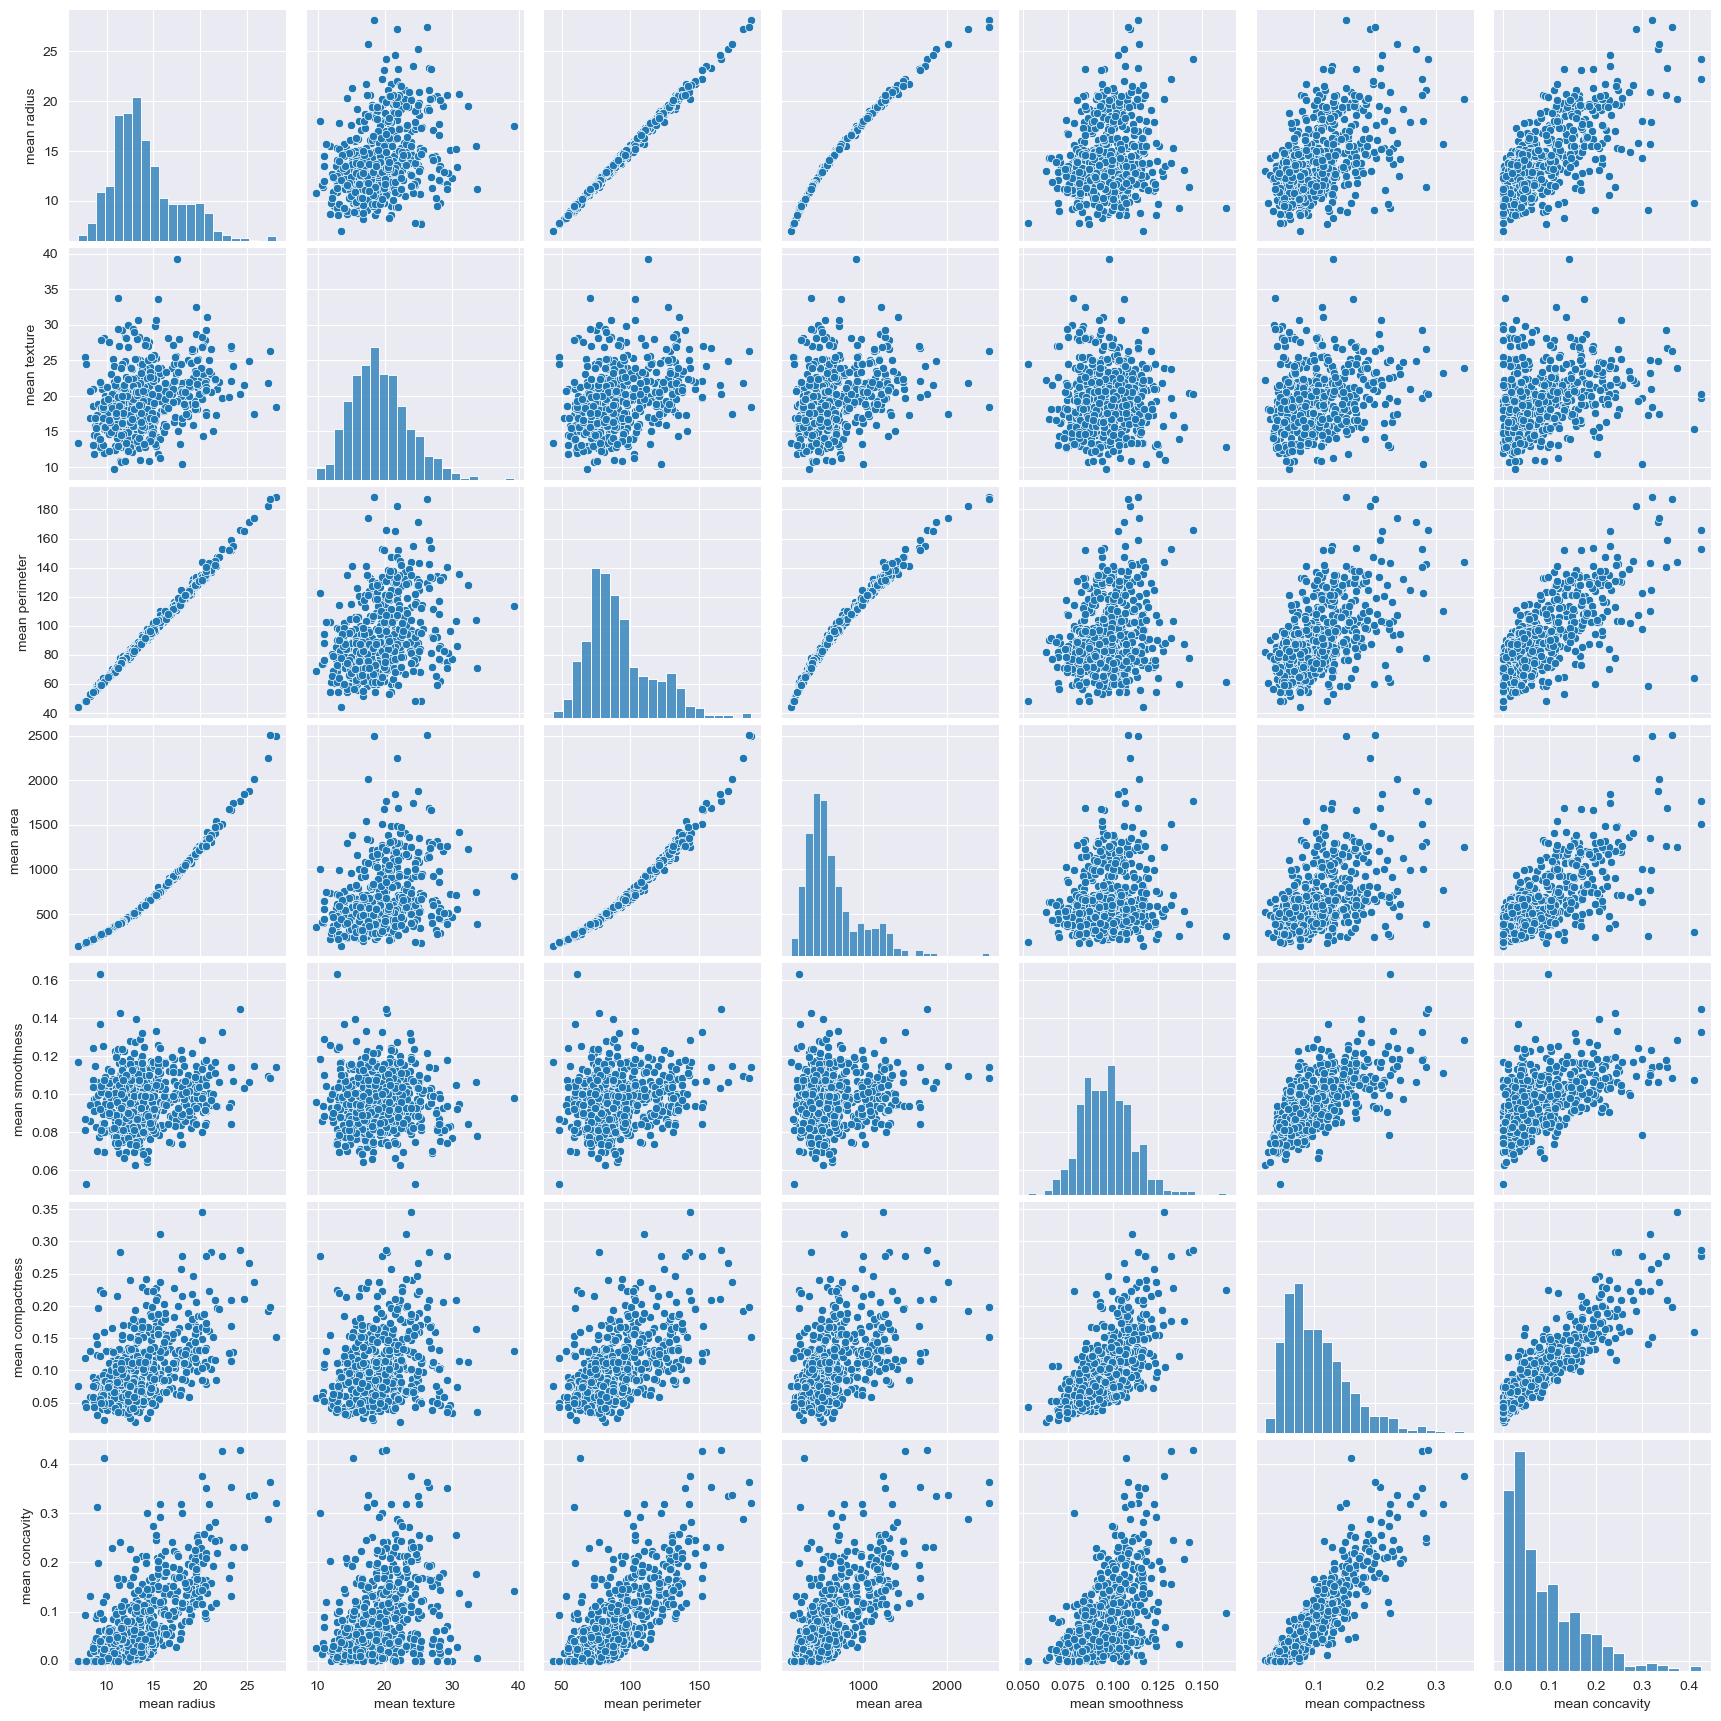

In [ ]:
# Create a pairplot for the first few features
print(breast_cancer_data.columns)
print(len(breast_cancer_data.columns))
breast_cancer_data[['mean radius', 'mean texture', 'mean perimeter','mean area', 'mean smoothness', 'mean compactness']].head()
sns.pairplot(breast_cancer_data[['mean radius', 'mean texture', 'mean perimeter','mean area', 'mean smoothness', 'mean compactness', 'mean concavity']])

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

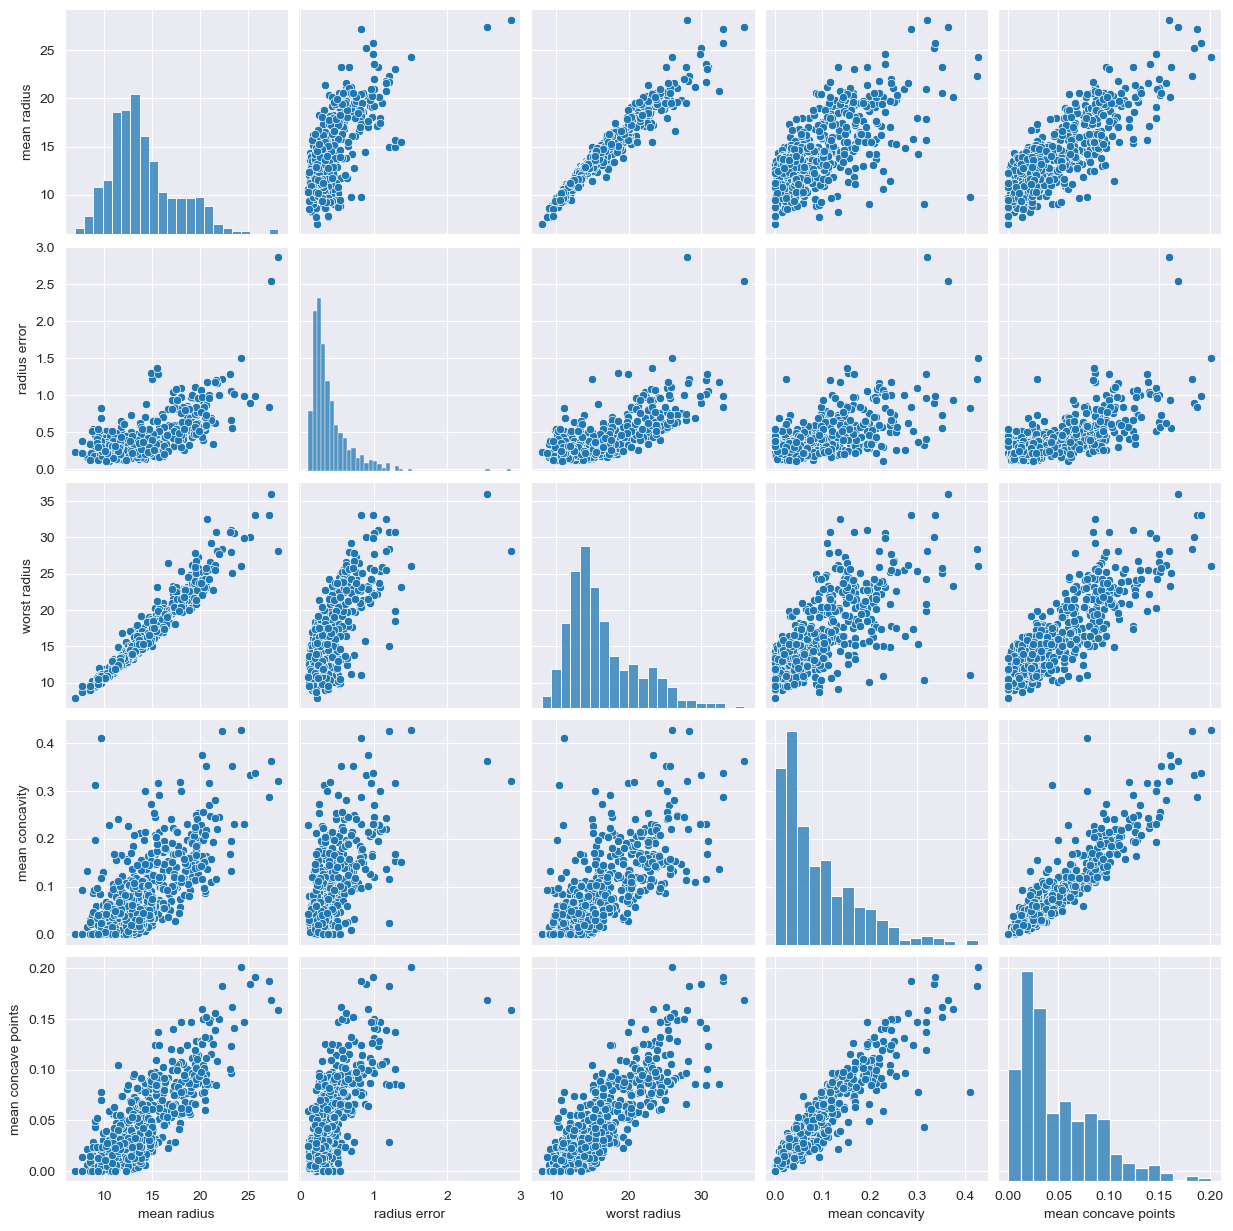

In [ ]:
sns.pairplot(breast_cancer_data[['mean radius', 'radius error', 'worst radius', 'mean concavity', 'mean concave points']])

# Analysis of marginal distribution and relationship among features
1. **Feature distributions**: The mean radius and worst radius are more symmetrically distributed while the radius error, mean concavity, mean concavity points are left skewed.
2. **Marginal distribution**: It appears that mean radius and worst radius has positive correlation while strong relationship is not evident between (radius error, means radius) and (radius error, worst radius), (mean concavity, mean concavity points).

<Axes: >

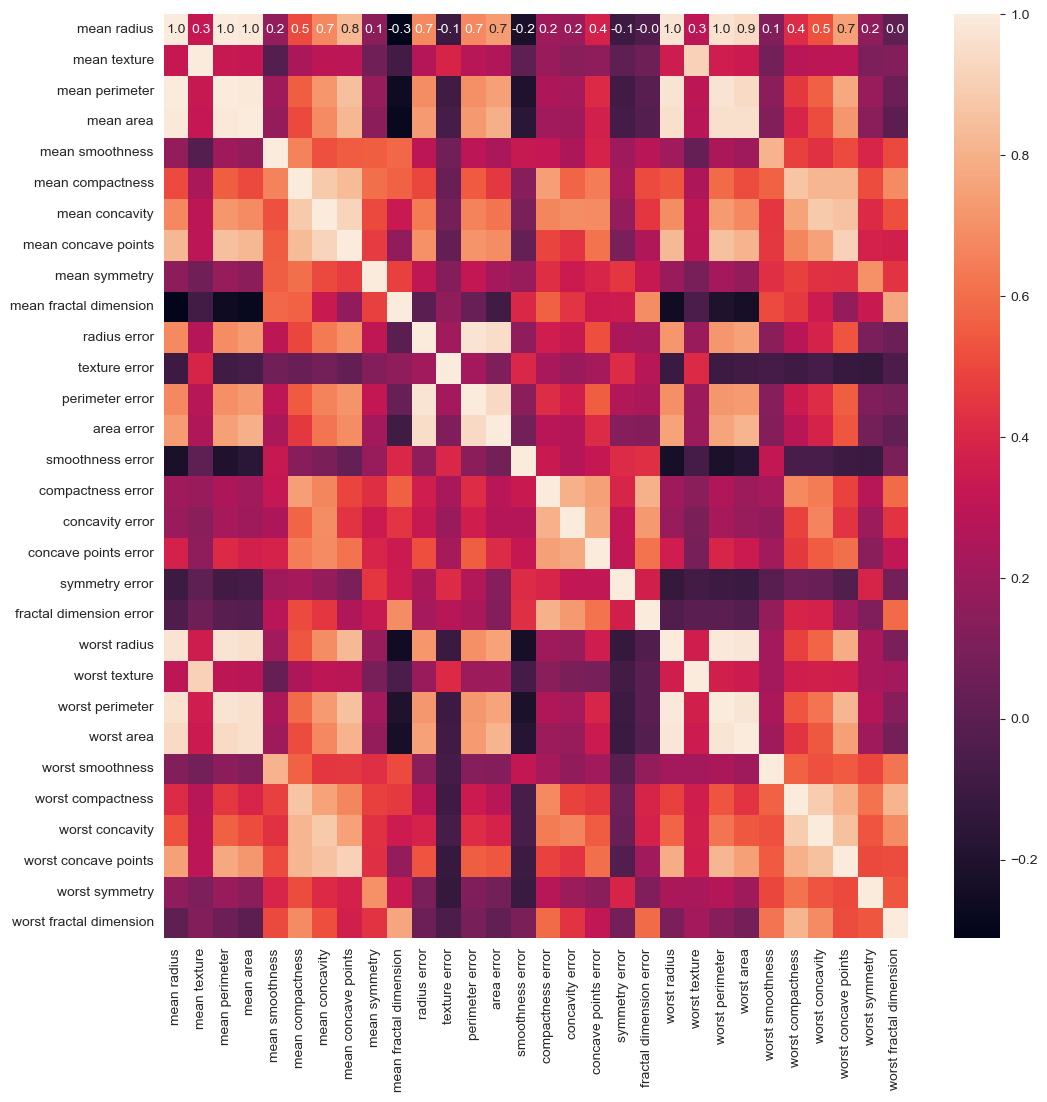

In [ ]:
# Create a correlation coefficeint heatmap
correlation_cancer_data = breast_cancer_data.corr()
# Increase the figure size so all features are shown
fig, axis = plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_cancer_data, ax=axis, annot=True, fmt='.1f')

# Correlation among the features
From the heatmap, various features shows different level of correlation.
1. **Strong correlation**: Several features show very strong correlation (correlation above 0.8). For examples, the mean radius is strongly correlated to mean perimeter, mean area, worst radius, worst perimeter,  worst area.
2. **Moderate correlation**: Several features show moderate correlation (correlation between 0.5 and 0.8). For examples, the mean radius shows moderate correlation to mean compactness, mean concavity, mean concavity points, radius error, perimeter error, area error, worst concavity and worst concavity points.
3. **Low correlation**: Several features show low correlation (between 0.5 and around -0.3). For example, mean radius shows low correlation to mean smoothness, mean symmetry, mean fractal dimension etc.

The heatmap aligns with observations made from the pairplot.

<Axes: title={'center': 'mean radius'}, xlabel='target'>

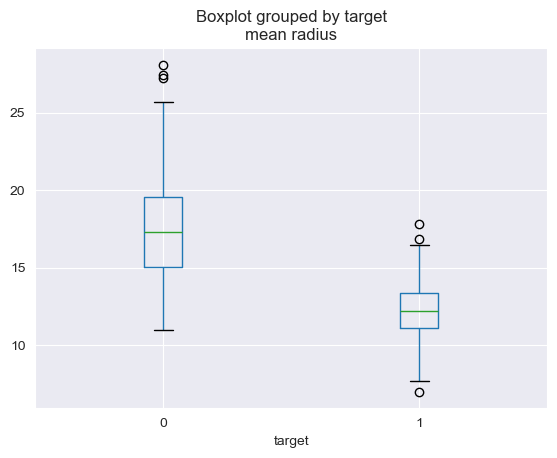

In [ ]:
# Create a boxplot for mean radius by target type
cancer_data_target = pd.concat([breast_cancer_data, target], axis=1)
cancer_data_target.head()
cancer_data_target.boxplot(column=['mean radius'], by='target')


357

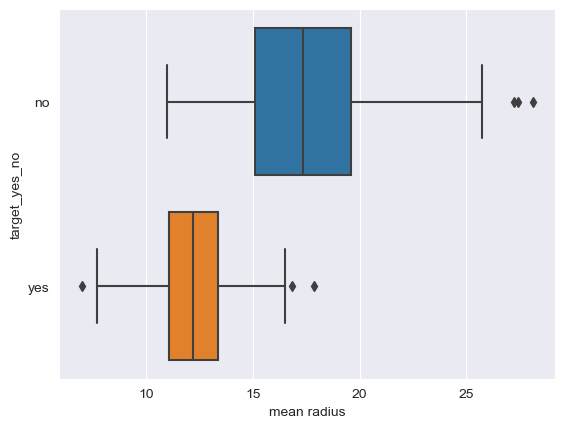

In [ ]:
# Boxplot by seaborn package
# create a new categorical column 'target_yes_no' with yes if target value is 1, no if target value is 0
cancer_data_target['target_yes_no'] = cancer_data_target.apply(lambda row: 'yes' if row['target'] == 1 else 'no', axis=1)
# print the head to check if the column is created properly
cancer_data_target['target_yes_no'].head()
# boxplot using newly created column as categorical feature
sns.boxplot(data = cancer_data_target, x=cancer_data_target['mean radius'], y=cancer_data_target['target_yes_no'])
# count the number of 'yes' in the 'target_yes_no' column
cancer_data_target['target_yes_no'] [cancer_data_target['target_yes_no'] == 'yes'].count()

In [ ]:
cancer_data_target[cancer_data_target['target_yes_no'] == 'no'].describe()
# cancer_data_target[cancer_data_target['target_yes_no'] == 'yes'].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.0
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,0.0
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553,0.0
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040,0.0
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302,0.0
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600,0.0
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625,0.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500,0.0


In [ ]:
# Find the outlier values (mean radius higher than 15 in 'mean radius' column). Note that Q1 boundary for target=0 is approximately mean radius 15.
cancer_data_target[(cancer_data_target['mean radius'] >= 15) & (cancer_data_target['target'] == 1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_yes_no
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,105.9,762.6,0.13860,0.28830,0.1960,0.14230,0.2590,0.07779,1,yes
133,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,...,114.3,922.8,0.12230,0.19490,0.1709,0.13740,0.2723,0.07071,1,yes
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,...,120.3,1032.0,0.08774,0.17100,0.1882,0.08436,0.2527,0.05972,1,yes
209,15.27,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,...,113.7,932.7,0.12220,0.21860,0.2962,0.10350,0.2320,0.07474,1,yes
227,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,114.2,808.2,0.11360,0.36270,0.3402,0.13790,0.2954,0.08362,1,yes
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,117.2,1009.0,0.13380,0.16790,0.1663,0.09123,0.2394,0.06469,1,yes
371,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,104.5,819.1,0.11260,0.17370,0.1362,0.08178,0.2487,0.06766,1,yes
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,113.1,861.5,0.12350,0.25500,0.2114,0.12510,0.3153,0.08960,1,yes
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,...,115.9,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012,1,yes
484,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,112.5,854.3,0.15410,0.29790,0.4004,0.14520,0.2557,0.08181,1,yes


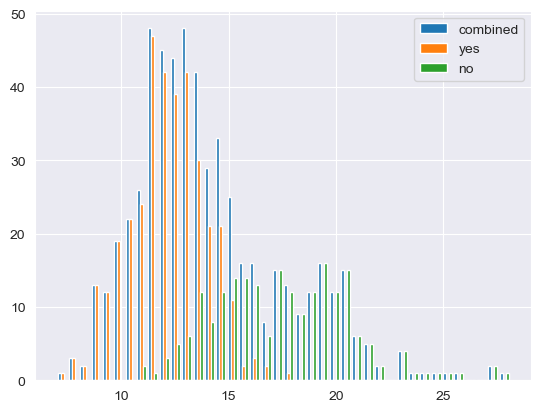

In [ ]:
# Plot the histogram for mean radius for all data points and for target value 1 and 0 separately
# cancer_data_target['mean radius'][cancer_data_target['target'] == 1].hist()
plt.hist([cancer_data_target['mean radius'], cancer_data_target['mean radius'][cancer_data_target['target'] == 1], cancer_data_target['mean radius'][cancer_data_target['target'] == 0]], label=['combined', 'yes', 'no'], bins=40)
plt.legend(loc='upper right')

# The cancer data: mean radius
- **Target 1** : When the target value is '1' (yes), mean radius is smaller with mean around 12.
- **Target 0** : When the target value is '0' (yes), mean radius is larger with mean around 17.

The Q3 upper boundary of target=1 is clearly separated by the Q1 upper boundary of target=0. With good confidence, target 1 or 0 can be classified by the mean radius. There are several outlier data points (13 data points that are higher than mean radius 15) in target=1.   

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, target, test_size=0.2, random_state=0)
print(f" X_train:{X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

 X_train:(455, 30), X_test: (114, 30), y_train: (455,), y_test: (114,)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Build and train logistic regression model
logreg = LogisticRegression()

# Apply the standard scaler
scaler = StandardScaler()

# Fit (i.e., compute the mean and std to be used for later scaling) on training set only.
scaler.fit(X_train)

# Perform standardization on training and test data by centering and scaling.
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model according to the given training data and storing the information learned from the data
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict a given row
print(f'For X_test[{0}], the logistic regression prediction is {logreg.predict(X_test[0].reshape(1,-1))[0]}')

For X_test[0], the logistic regression prediction is 0


As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [ ]:
# Evaluate the model
# Return the mean accuracy on the given test data and labels.
score = logreg.score(X_test, y_test)
print(f'Logistic Regression mean accuracy:{round(score * 100, 2)}%')


Logistic Regression mean accuracy:96.49%


In [ ]:
# Generate a confusion matrix
from sklearn import metrics
cm_cancer_logreg = metrics.confusion_matrix(y_test, logreg.predict(X_test))
print(cm_cancer_logreg)

[[45  2]
 [ 2 65]]


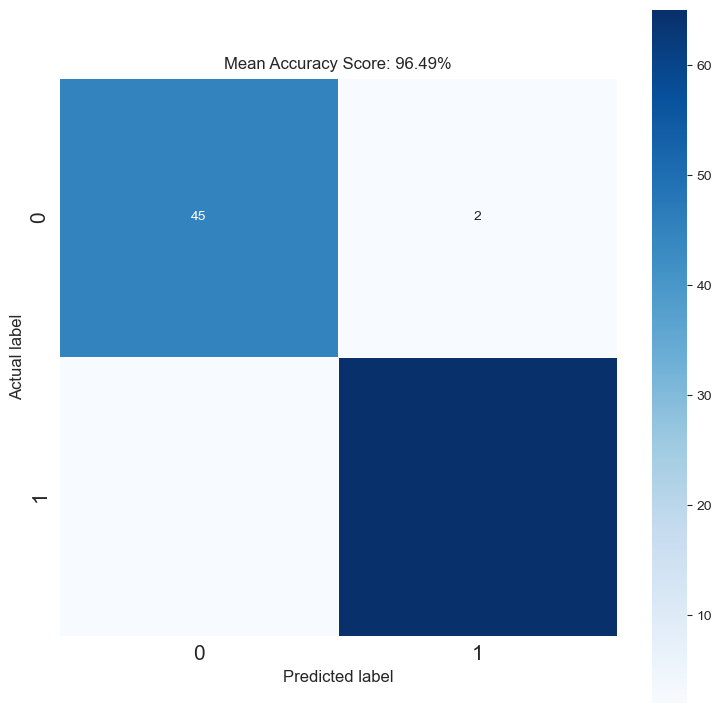

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_cancer_logreg, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues')
plt.ylabel('Actual label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
plt.title('Mean Accuracy Score: {}%'.format(round(score * 100, 2)), size = 12)
plt.tick_params(labelsize= 15)

In [ ]:
# Generate a classification report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# The performance of the logistic regression model

- **Score**: The mean accuracy (score) of 96.49% shows that model learns from the data well and perform well on the test data.
- **Confusion matrix**: Logistic regression classifier close to 1 (0.96 or above) for accuracy, precision, Recall, F1-Score confirms the model excellent performance.
- **Classification report**: The macro average and weighted average of 0.96 also confirms the model accuracy irrespective of different classes equally contributing the average (i.e., macro avg) or each class contribution to the average is weighted by its sample size (i.e., weighted avg).

Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [ ]:
# Extract coefficients
# Coefficient of the features in the decision function.
model_coeffs = logreg.coef_
print(model_coeffs)

[[-0.33876214 -0.48939456 -0.330574   -0.40274765 -0.19380529  0.44575519
  -0.67211017 -0.84612924 -0.33758483  0.21274935 -1.39050559  0.0394851
  -0.84507703 -0.97876119  0.25537755  0.6623816   0.12210568 -0.2273378
   0.12585617  0.86832724 -0.93114793 -1.04054114 -0.76764961 -0.9005161
  -0.53303391 -0.0284274  -0.86650877 -0.97095476 -0.51867962 -0.60055403]]


In [ ]:
# Normalize the coefficients by the standard deviation
model_coeffs_normalized = model_coeffs / model_coeffs.std()
# When x is normally distributed, then y is normally distributed with mean 0 and variance 1 where
# y = (x - mean(s) )/ std(x)^2
# model_coeffs_normalized = (model_coeffs - model_coeffs.mean()) / (model_coeffs.std() ** 2)
print(model_coeffs_normalized[0])

[-0.62897101 -0.90864638 -0.6137683  -0.74777128 -0.35983333  0.82762227
 -1.24788978 -1.57098654 -0.62678514  0.39500628 -2.58171621  0.07331097
 -1.56903294 -1.8172409   0.47415297  1.229827    0.22671051 -0.42209228
  0.23367393  1.61220099 -1.72883857 -1.93194615 -1.42527542 -1.67196524
 -0.98967043 -0.05278042 -1.60882469 -1.8027469  -0.96301919 -1.11503332]


In [ ]:
# Sort feature names and coefficients by absolute value of coefficients
# Create a numpy array with columns values and absolute value of normalized coefficients of the decision function
features_coeffs = np.concatenate(([breast_cancer_data.columns.values], np.absolute(model_coeffs_normalized)), axis=0)

# Create a panda dataframe 'data_frame_coeffs' column 'feature' contains feature name (corresponding to the coefficient)
# and 'normalized_value' contains the normalized coefficient of the decision function
data_frame_coeffs = pd.DataFrame(features_coeffs.transpose(), columns=['feature','normalized_value'])

# Sort the 'data_frame_coeffs' by descending order based on the normalized_value column
data_frame_coeffs_sorted = data_frame_coeffs.sort_values(by=['normalized_value'], ascending=False)
print(data_frame_coeffs_sorted)

                    feature normalized_value
10             radius error         2.581716
21            worst texture         1.931946
13               area error         1.817241
27     worst concave points         1.802747
20             worst radius         1.728839
23               worst area         1.671965
19  fractal dimension error         1.612201
26          worst concavity         1.608825
7       mean concave points         1.570987
12          perimeter error         1.569033
22          worst perimeter         1.425275
6            mean concavity          1.24789
15        compactness error         1.229827
29  worst fractal dimension         1.115033
24         worst smoothness          0.98967
28           worst symmetry         0.963019
1              mean texture         0.908646
5          mean compactness         0.827622
3                 mean area         0.747771
0               mean radius         0.628971
8             mean symmetry         0.626785
2         

<BarContainer object of 30 artists>

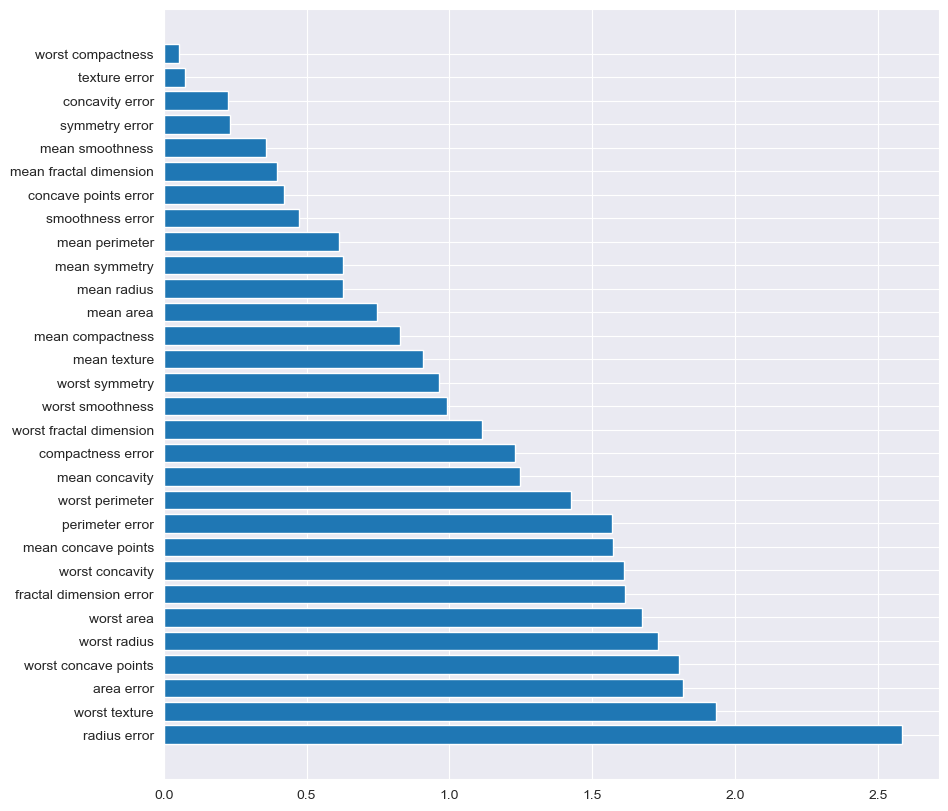

In [ ]:
# Visualize feature importances
plt.figure(figsize=(10, 10))
plt.barh(data_frame_coeffs_sorted['feature'].values, data_frame_coeffs_sorted['normalized_value'].values)

 # Feature importance
- There are 30 features used by the logistic regression model to predict the absence and presence of cancer (target 1 or 0). The trained model using the 30 features can predict with high accuracy (0.96 accuracy).
- Different features contribute to the model decision function at varying levels as shown in the bar graph.
- The highest contributor is 'radius error' while the lowest contributor is 'worst compactness'.
- The highest contributing coefficient 'radius error' (normalized by one standard deviation of all coefficients) is 2.58 while the least contributing feature 'worst compactness' is 0.05. Therefore, the highest contributing coefficient 'radius error' contributes to the prediction function almost 50 times more than the least contributing feature 'worst compactness'
